In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir("csse_covid_19_data/csse_covid_19_time_series")

FileNotFoundError: [Errno 2] No such file or directory: 'csse_covid_19_data/csse_covid_19_time_series'

In [3]:
confirmed =    pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered =    pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
deaths    =    pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

FileNotFoundError: [Errno 2] File b'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv' does not exist: b'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [33]:
confirmed.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20'],
      dtype='object')

In [36]:
dates = [datetime.strptime(i,"%m/%d/%y") for i in confirmed.columns[4:]]

In [44]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,71,86


In [45]:
time_series = confirmed[confirmed.columns[4:]].values.tolist()

In [ ]:
confirmed

In [70]:
def get_country(country, df):
    return df[df["Country/Region"]==country][df.columns[4:]].values.tolist()

In [166]:
def get_increments(time_series):
    increments = []
    cummulative = []
    state = 0
    time_series = np.sum(np.array(time_series),axis=0)
    for i in time_series:
        if i==0:
            continue
        else:
            increments.append(i-state)
            cummulative.append(i)
            state = i
    window_size = 7
    smoothed_increments = []
    for i in range(len(increments)):
        smoothed_increments.append(np.mean(increments[np.max([i-window_size,0]):i+1])+1)
    return increments, smoothed_increments, cummulative

In [167]:
def plot_country(country,df):
    increments, smoothed_increments, cummulative = get_increments(get_country(country,df))
    plt.plot(np.log10(cummulative),np.log10(smoothed_increments), label=country)

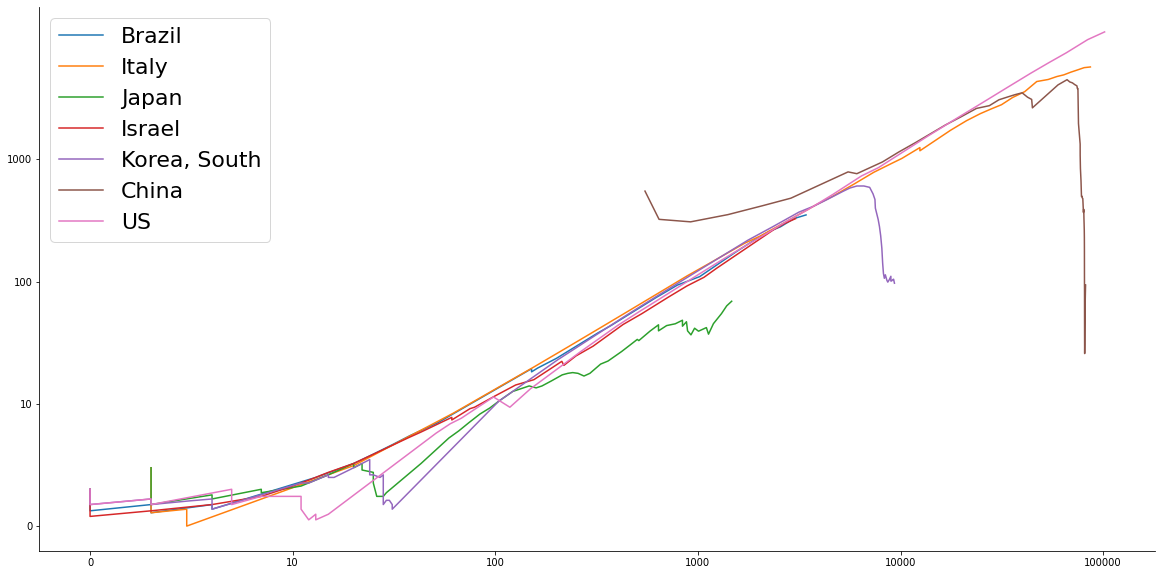

In [171]:
countries = ["Brazil", "Italy", "Japan", "Israel",
             "Korea, South", "China", "US"]
plt.figure(figsize=(20,10))
for country in countries:
    plot_country(country, confirmed)

plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
plt.savefig("gsadgsdgd.jpg",dpi=300)
plt.show()